# <en><center>Time Series Data</center></en>

Table of Contents

- [Datetime Index](#Datetime-Index)
- [Reindexing](#Reindexing)
- [Resampling](#Resampling)
- [Rolling Functions](#Rolling-Functions)
- [Time Zones](#Time-Zones)
- [Summary](#Summary)

### Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Datetime Index

In [43]:
datetime_data = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-8-Time-Series-Resources\\all_stocks_5yr.csv"

df.date = pd.to_datetime(df.date)

In [44]:
df = pd.read_csv(datetime_data, parse_dates=["date"])
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [45]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
df2 = df.set_index(["Name", "date"]).sort_index()
df2.head()

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245

In [9]:
df2.loc["AAL"]

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [10]:
df2.xs("AAL")

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [11]:
aal = df2.xs("AAL")

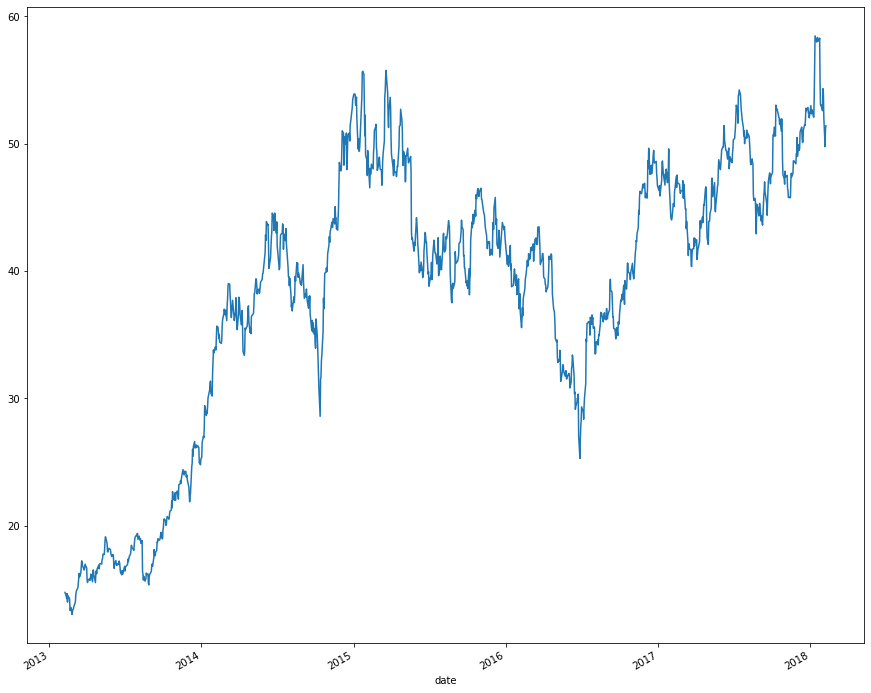

In [15]:
aal["close"].plot(figsize = (15,13));

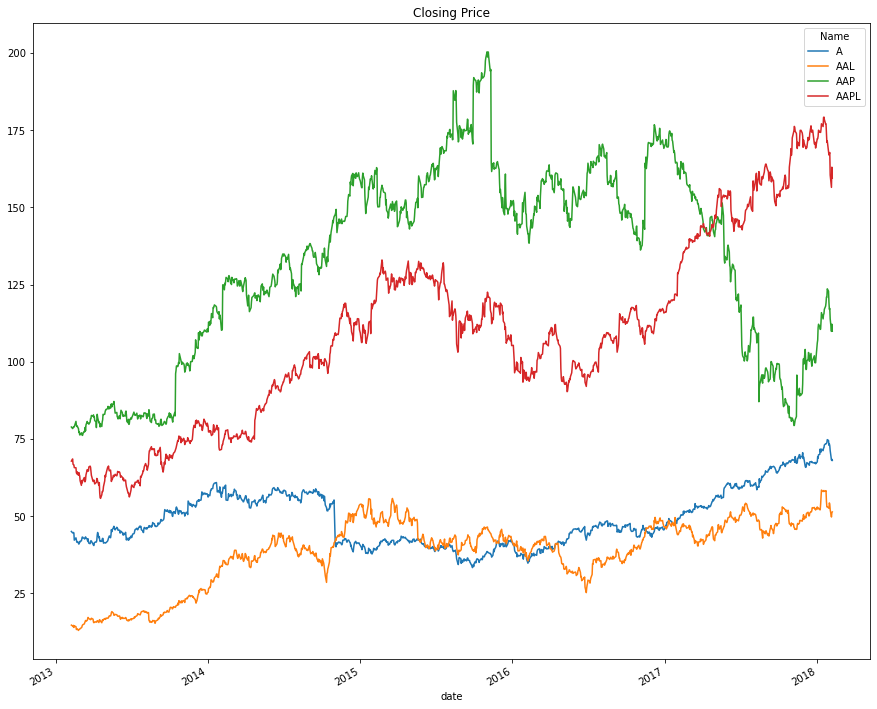

In [17]:
idx = pd.IndexSlice
df_a = df2.loc[idx["A": "AB", :], :]
df_a["close"].unstack(level = "Name").plot(title = "Closing Price", figsize = (15,13));

### Slicing DateTimes

Scenario:

- Lets say that we only want to look at the 2017 year. 
- We've seen how to slice on security (ie a string), but what about datetimes?
- Lets simplify and look at the AAL dataframe so we only have one level of index.

In [19]:
aal["2017"]

C:\Users\pyria\AppData\Local\Temp\ipykernel_20960\854189754.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aal["2017"]


,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2017-12-22,52.72,52.880,52.420,52.59,2425104
2017-12-26,52.35,53.215,52.330,52.85,2774316
2017-12-27,52.80,52.880,52.060,52.40,2831434


New way to do it

In [22]:
aal.loc["2017"]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2017-12-22,52.72,52.880,52.420,52.59,2425104
2017-12-26,52.35,53.215,52.330,52.85,2774316
2017-12-27,52.80,52.880,52.060,52.40,2831434


In [25]:
aal[idx["2017":"2017-03-10"]]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.2800,47.3400,46.1350,46.30,6737752
2017-01-04,46.6300,47.4350,46.3500,46.70,5859604
2017-01-05,46.5200,46.9300,45.6100,45.89,6825316
2017-01-06,45.8500,46.7200,45.4700,46.21,7260197
2017-01-09,46.0100,47.3400,45.7800,47.08,4739142
2017-01-10,47.0000,48.5100,46.9700,48.48,7483764
2017-01-11,49.2900,49.9000,48.1000,48.64,6925770
2017-01-12,48.6700,49.0000,46.8400,48.10,5448098
2017-01-13,48.1600,48.4300,47.5400,47.65,3541980


In [32]:
df2.loc[idx[:, "2017": "2017-03-10"], ["open", "close"]]

open  close
Name date                    
A    2017-01-03  45.93  46.49
     2017-01-04  46.93  47.10
     2017-01-05  47.05  46.54
     2017-01-06  46.63  47.99
     2017-01-09  48.01  48.14
...                ...    ...
ZTS  2017-03-03  53.34  53.42
     2017-03-06  53.01  53.08
     2017-03-07  52.86  53.07
     2017-03-08  53.02  53.00
     2017-03-09  53.05  53.69

[22999 rows x 2 columns]

In [33]:
df2.loc[idx[:, "2017": "2017-03-10"], :]

open     high      low  close   volume
Name date                                               
A    2017-01-03  45.93  46.7500  45.7400  46.49  1739726
     2017-01-04  46.93  47.3800  46.8162  47.10  1821264
     2017-01-05  47.05  47.0700  46.3550  46.54  1503763
     2017-01-06  46.63  48.0700  46.5600  47.99  2883483
     2017-01-09  48.01  48.5550  47.9050  48.14  2575328
...                ...      ...      ...    ...      ...
ZTS  2017-03-03  53.34  53.7175  53.2500  53.42  2483602
     2017-03-06  53.01  53.3250  52.8800  53.08  1832305
     2017-03-07  52.86  53.3750  52.6400  53.07  2763243
     2017-03-08  53.02  53.4100  52.7900  53.00  2095304
     2017-03-09  53.05  53.7150  52.9100  53.69  3187968

[22999 rows x 5 columns]

### Recap

- parse_dates
- to_datetime
- slicing on timeseries

## Reindexing

In our current data, we have only business days. 

What if we want the ability to look up any day in our date range and get the value?

We can look back to the last trading day in this case

We will look at AAL again.

In [34]:
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [35]:
start, end = aal.index.min(), aal.index.max()
print(start, end)

2013-02-08 00:00:00 2018-02-07 00:00:00


In [36]:
new_index = pd.date_range(start, end)
new_index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [39]:
new_index = pd.date_range(start, end)
new_index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

- if you want a forward fill then: method = "ffill"
- if you wanted to do a back fill it will be method = "bfill", 
- if you want the nearest fill then put method = "nearest".

In [41]:
aal2 = aal.reindex(new_index, method = "ffill") 
aal2

,open,high,low,close,volume
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-09,15.07,15.12,14.63,14.75,8407500
2013-02-10,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
...,...,...,...,...,...
2018-02-03,53.49,53.99,52.03,52.10,5109361
2018-02-04,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284
2018-02-06,49.32,51.50,48.79,51.18,6782480


Now every date has a time.

What if we wanted to do this to all the securities? 

and lets only fill within 2 days to cater to a weekend but not to something more drastic!

- If we tried to use the level feature of the reindex function, we cannot use method = "ffill"

In [50]:
stock_data_pickle = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-8-Time-Series-Resources\\stocks.pkl"

In [52]:
df = pd.read_pickle(stock_data_pickle)
df

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

In [54]:
start, end = df.index.levels[1].min(), df.index.levels[1].max()
print(start, end)

2013-02-08 00:00:00 2018-02-07 00:00:00


In [55]:
date_range = pd.date_range(start, end)

This does not work

In [57]:
df.reindex(index = date_range, level = 1)

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

Reindexing on levels.

- This also doesn't work.
- Pandas doesn't know how to reindex on the index level as it doesn't know if it would overlap days for the other securities.
- This also has alot of bugs.

In [58]:
df.reindex(date_range, level = 1, method = "ffill")

TypeError: Fill method not supported if level passed

The solution is to recreate the indexes from scratch

In [59]:
new_index = pd.MultiIndex.from_product([df.index.levels[0], date_range])
df.reindex(index = new_index)

open   high    low  close     volume
Name                                                  
A    2013-02-08  45.07  45.35  45.00  45.08  1824755.0
     2013-02-09    NaN    NaN    NaN    NaN        NaN
     2013-02-10    NaN    NaN    NaN    NaN        NaN
     2013-02-11  45.17  45.18  44.45  44.60  2915405.0
     2013-02-12  44.81  44.95  44.50  44.62  2373731.0
...                ...    ...    ...    ...        ...
ZTS  2018-02-03    NaN    NaN    NaN    NaN        NaN
     2018-02-04    NaN    NaN    NaN    NaN        NaN
     2018-02-05  76.64  76.92  73.18  73.83  2962031.0
     2018-02-06  72.74  74.56  72.13  73.27  4924323.0
     2018-02-07  72.70  75.00  72.69  73.86  4534912.0

[922130 rows x 5 columns]

We need to get rid of the multiIndex
- Put all the securities as columns
- That way we can use forward fill without having to worry if one security is impacted by another

In [61]:
filled = df.unstack("Name").reindex(date_range, method = "ffill", tolerance = pd.Timedelta("2 days"))
filled = filled.stack("Name").swaplevel().sort_index()
filled

open   high    low  close     volume
Name                                                  
A    2013-02-08  45.07  45.35  45.00  45.08  1824755.0
     2013-02-09  45.07  45.35  45.00  45.08  1824755.0
     2013-02-10  45.07  45.35  45.00  45.08  1824755.0
     2013-02-11  45.17  45.18  44.45  44.60  2915405.0
     2013-02-12  44.81  44.95  44.50  44.62  2373731.0
...                ...    ...    ...    ...        ...
ZTS  2018-02-03  77.53  78.12  76.73  76.78  2595187.0
     2018-02-04  77.53  78.12  76.73  76.78  2595187.0
     2018-02-05  76.64  76.92  73.18  73.83  2962031.0
     2018-02-06  72.74  74.56  72.13  73.27  4924323.0
     2018-02-07  72.70  75.00  72.69  73.86  4534912.0

[881082 rows x 5 columns]

Other methods are:

- ffill: Fill forward.
- bfill: fill backwards.
- nearest: pick the nearest value.
- none: inserts NaN values.

All of these operations will also fail on an index which isn't sorted.
- Always sort your indexes when you set them.
    

### Recap
- date_range
- reindex

## Resampling

Sometimes we have too much data and we need to zoom out to get a better perspective. 

To do this, Pandas offfers a resampling method which is similar to the groupby method.

### Dataset

In [5]:
stock_data_pickle = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-8-Time-Series-Resources\\stocks.pkl"

In [6]:
df = pd.read_pickle(stock_data_pickle)
df

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

Resampling Rules

- We have many years and many more months, which we may want to look at as a whole.
- We will start simple and look at the AAL stock.

In [24]:
aal = df.xs("AAL")

In [26]:
aal.resample(rule = "A").mean()

,open,high,low,close,volume
date,,,,,
2013-12-31,18.614336,18.920291,18.308745,18.601549,8.201441e+06
2014-12-31,38.861944,39.549713,38.229872,38.923550,1.239803e+07
2015-12-31,45.184325,45.835482,44.447715,45.121607,1.155447e+07
2016-12-31,38.154365,38.722188,37.607546,38.183829,9.166420e+06
2017-12-31,47.499935,48.063533,46.932376,47.490717,5.871768e+06
2018-12-31,54.221154,55.001877,53.568481,54.280000,5.734882e+06


So lets talk syntax here. `rule="A"` is probably not the most intuitive thing you've ever read.

Luckily pandas has a cookbook for resampling rules, however its a bit... disjointed.
https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

Here's the page you actually want, which took me too long to find again:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

Let me paste it in here:

| Date Offset | Frequency String | Description                                         |
| --- | --- | --- |
| DateOffset | None | Generic offset class, defaults to 1 calendar day                 |
| BDay or BusinessDay | 'B' | business day (weekday)                                   |
| CDay or CustomBusinessDay | 'C' | custom business day                                |
| Week | 'W' | one week, optionally anchored on a day of the week                      |
| WeekOfMonth | 'WOM' | the x-th day of the y-th week of each month                    |
| LastWeekOfMonth | 'LWOM' | the x-th day of the last week of each month               |
| MonthEnd | 'M' | calendar month end                                                  |
| MonthBegin | 'MS' | calendar month begin                                             |
| BMonthEnd or BusinessMonthEnd | 'BM' | business month end                            |
| BMonthBegin or BusinessMonthBegin | 'BMS' | business month begin                     |
| CBMonthEnd or CustomBusinessMonthEnd | 'CBM' | custom business month end             |
| CBMonthBegin or CustomBusinessMonthBegin | 'CBMS' | custom business month begin      |
| SemiMonthEnd | 'SM' | 15th (or other day_of_month) and calendar month end            |
| SemiMonthBegin | 'SMS' | 15th (or other day_of_month) and calendar month begin       |
| QuarterEnd | 'Q' | calendar quarter end                                              |
| QuarterBegin | 'QS' | calendar quarter begin                                         |
| BQuarterEnd | 'BQ | business quarter end                                             |
| BQuarterBegin | 'BQS' | business quarter begin                                       |
| FY5253Quarter | 'REQ' | retail (aka 52-53 week) quarter                              |
| YearEnd | 'A' | calendar year end                                                    |
| YearBegin | 'AS' or 'BYS' | calendar year begin                                      |
| BYearEnd | 'BA' | business year end                                                  |
| BYearBegin | 'BAS' | business year begin                                             |
| FY5253 | 'RE' | retail (aka 52-53 week) year                                         |
| Easter | None | Easter holiday                                                       |
| BusinessHour | 'BH' | business hour                                                  |
| CustomBusinessHour | 'CBH' | custom business hour                                    |
| Day | 'D' | one absolute day                                                         |
| Hour | 'H' | one hour                                                                |
| Minute | 'T' or 'min' | one minute                                                   |
| Second | 'S' | one second                                                            |
| Milli | 'L' or 'ms' | one millisecond                                                |
| Micro | 'U' or 'us' | one microsecond                                                |
| Nano | 'N' | one nanosecond                                                          |


Also see this page for different anchoring: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets

Resample by month end

In [32]:
aal.resample(rule = "M").mean()

,open,high,low,close,volume
date,,,,,
2013-02-28,14.055714,14.282143,13.567143,13.877143,1.124254e+07
2013-03-31,15.692000,15.983000,15.483500,15.776500,9.358335e+06
2013-04-30,16.095455,16.400000,15.791818,16.108636,6.915250e+06
2013-05-31,17.845455,18.166364,17.590455,17.810909,5.790636e+06
2013-06-30,16.852500,17.103500,16.575500,16.839000,5.202275e+06
...,...,...,...,...,...
2017-10-31,50.883182,51.459918,50.167368,50.756364,5.389377e+06
2017-11-30,47.437143,48.039729,47.043729,47.587143,3.485034e+06
2017-12-31,51.149000,51.728275,50.762245,51.150500,4.000605e+06


Instead of using a rule you can use Timedelta

In [33]:
aal.resample(pd.Timedelta("3 days")).mean()

,open,high,low,close,volume
date,,,,,
2013-02-08,15.070000,15.120000,14.630000,14.750000,8.407500e+06
2013-02-11,14.546667,14.820000,14.203333,14.463333,9.089167e+06
2013-02-14,14.435000,14.785000,13.545000,14.245000,2.375395e+07
2013-02-17,14.330000,14.560000,14.080000,14.260000,1.135440e+07
2013-02-20,13.786667,13.936667,13.086667,13.423333,1.090623e+07
...,...,...,...,...,...
2018-01-25,53.825000,54.225000,52.275000,53.060000,8.644595e+06
2018-01-28,52.620000,53.105000,52.472500,52.635000,5.347742e+06
2018-01-31,53.523333,54.446667,52.873333,53.433333,4.898459e+06


Origin is if you want your day to start at a specific time. 
- If you wanted your day to start at 9 am then the origin will be 9.

In [36]:
aal.resample(pd.Timedelta("3 days"), label = "right", origin = 0).mean()

,open,high,low,close,volume
date,,,,,
2013-02-11,15.070000,15.120000,14.630000,14.750000,8.407500e+06
2013-02-14,14.546667,14.820000,14.203333,14.463333,9.089167e+06
2013-02-17,14.435000,14.785000,13.545000,14.245000,2.375395e+07
2013-02-20,14.330000,14.560000,14.080000,14.260000,1.135440e+07
2013-02-23,13.786667,13.936667,13.086667,13.423333,1.090623e+07
...,...,...,...,...,...
2018-01-28,53.825000,54.225000,52.275000,53.060000,8.644595e+06
2018-01-31,52.620000,53.105000,52.472500,52.635000,5.347742e+06
2018-02-03,53.523333,54.446667,52.873333,53.433333,4.898459e+06


In [38]:
df.resample("A", level = 1).mean()

,open,high,low,close,volume
date,,,,,
2013-12-31,64.333983,64.913807,63.768605,64.368619,4.573753e+06
2014-12-31,76.965995,77.647126,76.267191,76.969836,4.163922e+06
2015-12-31,84.133849,84.950439,83.275557,84.134718,4.323950e+06
2016-12-31,85.214264,86.057550,84.369887,85.253095,4.556555e+06
2017-12-31,98.777123,99.555482,97.981006,98.800312,3.970423e+06
2018-12-31,111.250128,112.491921,110.048988,111.287631,4.825638e+06


In [39]:
df.reset_index(level = 0).groupby("Name").resample("A").mean()

open       high        low      close        volume
Name date                                                                
A    2013-12-31  47.079690  47.520217  46.694402  47.104823  3.030077e+06
     2014-12-31  54.123056  54.578355  53.637273  54.119802  2.272998e+06
     2015-12-31  39.590833  39.941183  39.234304  39.602143  2.560840e+06
     2016-12-31  43.338492  43.731210  42.970086  43.369960  2.083182e+06
     2017-12-31  59.330558  59.731322  58.922418  59.339641  1.849346e+06
...                    ...        ...        ...        ...           ...
ZTS  2014-12-31  34.028567  34.325801  33.747287  34.063405  4.028968e+06
     2015-12-31  46.127460  46.610730  45.560357  46.101310  3.452446e+06
     2016-12-31  47.825098  48.242964  47.353975  47.833968  3.761415e+06
     2017-12-31  61.065797  61.508155  60.699779  61.129442  2.694186e+06
     2018-12-31  75.771154  76.456069  75.138296  75.800769  2.946851e+06

[2975 rows x 5 columns]

Alternatively you can also do it this way

In [40]:
df.groupby(level = "Name").resample("A", level = 1).mean()

open       high        low      close        volume
Name date                                                                
A    2013-12-31  47.079690  47.520217  46.694402  47.104823  3.030077e+06
     2014-12-31  54.123056  54.578355  53.637273  54.119802  2.272998e+06
     2015-12-31  39.590833  39.941183  39.234304  39.602143  2.560840e+06
     2016-12-31  43.338492  43.731210  42.970086  43.369960  2.083182e+06
     2017-12-31  59.330558  59.731322  58.922418  59.339641  1.849346e+06
...                    ...        ...        ...        ...           ...
ZTS  2014-12-31  34.028567  34.325801  33.747287  34.063405  4.028968e+06
     2015-12-31  46.127460  46.610730  45.560357  46.101310  3.452446e+06
     2016-12-31  47.825098  48.242964  47.353975  47.833968  3.761415e+06
     2017-12-31  61.065797  61.508155  60.699779  61.129442  2.694186e+06
     2018-12-31  75.771154  76.456069  75.138296  75.800769  2.946851e+06

[2975 rows x 5 columns]

In [42]:
index = pd.date_range(start = "2000-01-01", end = "2000-01-02", freq = "5min" )
data = np.random.normal(size = index.size)
df_hours = pd.DataFrame(data, columns = ["Rand"], index = index)
df_hours

,Rand
2000-01-01 00:00:00,-0.462652
2000-01-01 00:05:00,0.235852
2000-01-01 00:10:00,0.325802
2000-01-01 00:15:00,0.927506
2000-01-01 00:20:00,-0.726000
...,...
2000-01-01 23:40:00,-0.913841
2000-01-01 23:45:00,-0.732694
2000-01-01 23:50:00,0.523485
2000-01-01 23:55:00,1.232187


In [43]:
df_hours.resample("1H", origin = 0.5).mean()

,Rand
2000-01-01 00:00:00,0.032302
2000-01-01 01:00:00,0.358394
2000-01-01 02:00:00,0.278622
2000-01-01 03:00:00,0.015776
2000-01-01 04:00:00,0.307894
2000-01-01 05:00:00,0.184312
2000-01-01 06:00:00,0.392636
2000-01-01 07:00:00,0.363329
2000-01-01 08:00:00,0.046529
2000-01-01 09:00:00,-0.187107


In [56]:
df_hours.resample("30min", origin = "start").mean()

,Rand
2000-01-01 00:00:00,0.153734
2000-01-01 00:30:00,-0.089130
2000-01-01 01:00:00,0.516467
2000-01-01 01:30:00,0.200320
2000-01-01 02:00:00,0.048115
2000-01-01 02:30:00,0.509129
2000-01-01 03:00:00,0.354457
2000-01-01 03:30:00,-0.322906
2000-01-01 04:00:00,0.931822
2000-01-01 04:30:00,-0.316034


### Resampling Functions

Just like groupnby, there are many functions and you can also pass in your own.

- bfill
- count
- ffill
- first
- last
- max
- min
- mean
- median
- std
- sum
- var
- ohlc (open, high, low, close) our data is in this format
- nunique
- some other functions

In [57]:
aal["close"].resample("1M").ohlc()

,open,high,low,close
date,,,,
2013-02-28,14.75,14.75,13.02,13.43
2013-03-31,13.61,17.23,13.61,16.97
2013-04-30,16.67,16.90,15.52,16.90
2013-05-31,16.60,19.12,16.60,17.57
2013-06-30,17.73,17.73,16.13,16.42
...,...,...,...,...
2017-10-31,47.73,53.03,46.82,46.82
2017-11-30,47.84,50.49,45.74,50.49
2017-12-31,49.00,52.85,49.00,52.03


In [58]:
aal["close"].resample("1M").apply(lambda x: np.median(x))

date
2013-02-28    13.780
2013-03-31    16.115
2013-04-30    16.120
2013-05-31    17.795
2013-06-30    16.925
               ...  
2017-10-31    51.160
2017-11-30    47.510
2017-12-31    51.180
2018-01-31    53.780
2018-02-28    51.400
Freq: M, Name: close, Length: 61, dtype: float64

In [59]:
aal["close"].resample("1M").median()

date
2013-02-28    13.780
2013-03-31    16.115
2013-04-30    16.120
2013-05-31    17.795
2013-06-30    16.925
               ...  
2017-10-31    51.160
2017-11-30    47.510
2017-12-31    51.180
2018-01-31    53.780
2018-02-28    51.400
Freq: M, Name: close, Length: 61, dtype: float64

In [60]:
aal.resample("1M").median()

,open,high,low,close,volume
date,,,,,
2013-02-28,14.050,14.38500,13.30000,13.780,9150500.0
2013-03-31,15.890,16.34500,15.79500,16.115,8472600.0
2013-04-30,16.105,16.44000,15.78000,16.120,5655700.0
2013-05-31,17.780,18.18500,17.61000,17.795,5466650.0
2013-06-30,16.930,17.17000,16.65000,16.925,4272500.0
...,...,...,...,...,...
2017-10-31,51.565,51.88995,50.58005,51.160,4418555.0
2017-11-30,47.510,47.92910,47.18830,47.510,3198779.0
2017-12-31,51.240,51.62500,50.84500,51.180,3041097.5


In [63]:
aal.groupby(pd.Grouper(freq = "1M")).agg(MedianClose = ("close", "median"))

,MedianClose
date,
2013-02-28,13.780
2013-03-31,16.115
2013-04-30,16.120
2013-05-31,17.795
2013-06-30,16.925
...,...
2017-10-31,51.160
2017-11-30,47.510
2017-12-31,51.180


### Recap
- resample
- The rules you can use are many
- Aggregate using apply
- Can also use Grouper(freq = "")
- Grouper aggregates just like groupby

## Rolling Functions

### Dataset

In [5]:
stock_data_pickle = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-8-Time-Series-Resources\\stocks.pkl"

In [64]:
df = pd.read_pickle(stock_data_pickle)
aal = df.xs("AAL").copy()
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


Rolling
- Lets say we want to look at a rolling window over the course of 5 open days while looking at the closing values of the security. 

The window argument means the number of entries
- It doesn't care about weekends

In [65]:
aal["RollingMean"] = aal["close"].rolling(window = 5).mean()
aal

,open,high,low,close,volume,RollingMean
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426
...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530


In [66]:
aal["RollingCenterMean"] = aal["close"].rolling(window = 5, center = True).mean()
aal

,open,high,low,close,volume,RollingMean,RollingCenterMean
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN,14.426
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN,14.376
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426,14.336
...,...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308,52.530
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114,52.248
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530,51.664


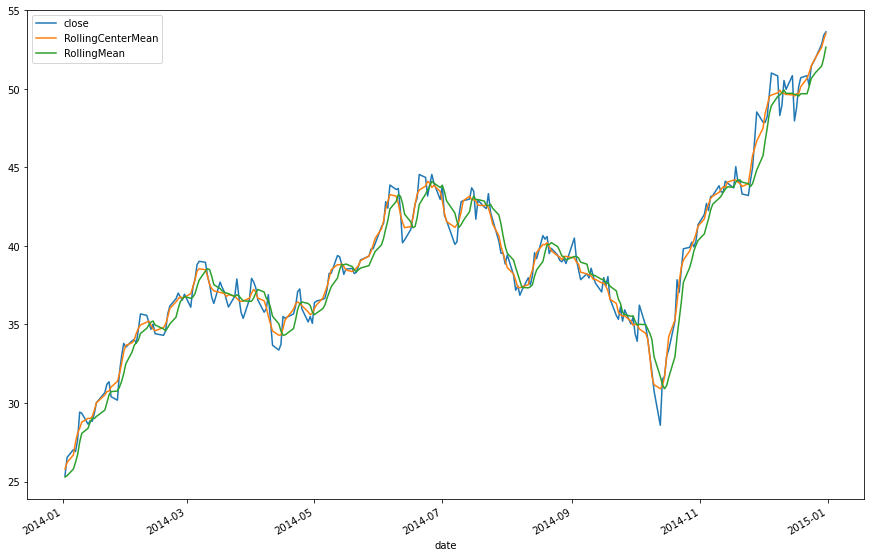

In [71]:
aal.loc["2014"].reset_index().plot(x = "date", y = ["close", "RollingCenterMean", "RollingMean"], figsize = (15,10));

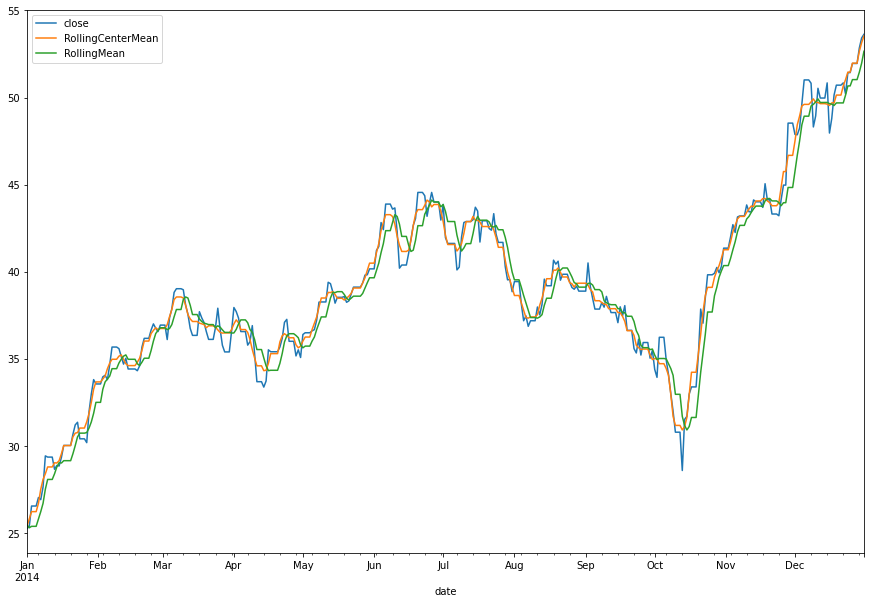

In [75]:
new_index = pd.date_range(aal.index.min(), aal.index.max(), name = "date")
aal2 = aal.reindex(new_index, method = "ffill")
aal2.loc["2014"].reset_index().plot(x = "date", y = ["close", "RollingCenterMean", "RollingMean"], figsize = (15,10));

## Window Functions

When we take the mean of 5 points, we normally give them the same weight. However, we dont have to. Doing something like Gaussian smoothing, we would roll with a filter that isn't uniform (tophat / boxcar), we would use a Gaussian filter. You can see the list of filters here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

And rolling returns a window object, which we called mean on before. But you can see more about the object here: https://pandas.pydata.org/pandas-docs/stable/reference/window.html

The window objects for specific filters are implemented in scipy:
https://docs.scipy.org/doc/scipy/reference/signal.windows.html


Rolling has a generic `apply` for custom functions, but specifying a window may not allow this. For example, we cannot choose a Gaussian window and use apply.

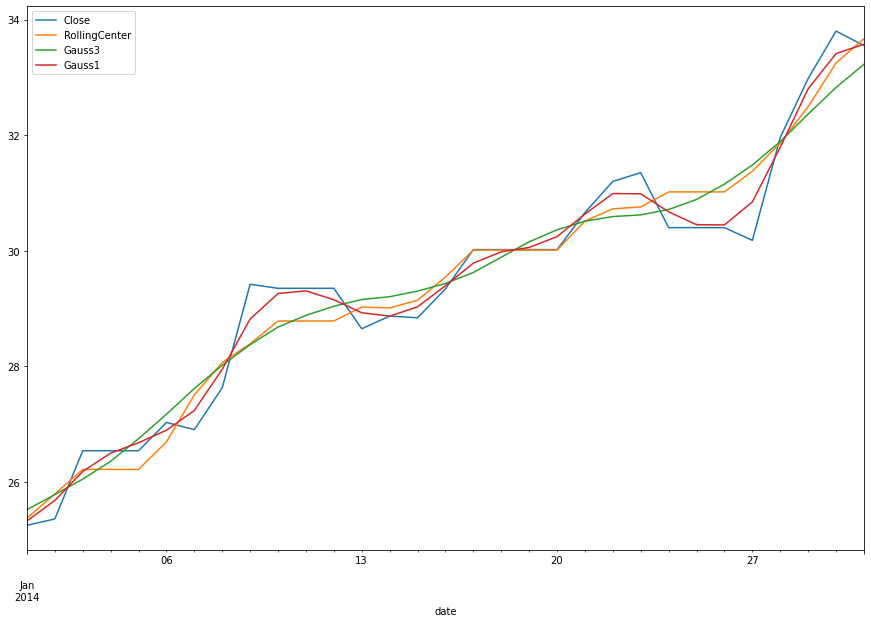

In [82]:
aal2["Gauss3"] = aal2["close"].rolling(window = 9, win_type = "gaussian", center = True).mean(std = 3)
aal2["Gauss1"] = aal2["close"].rolling(window = 9, win_type = "gaussian", center = True).mean(std = 1)

ax = aal2.loc["2014-01"].reset_index().plot(x = "date", y = "close", label = "Close", figsize = (15,10));
aal2.loc["2014-01"].reset_index().plot(x = "date", y = "RollingCenterMean", ax = ax, label = "RollingCenter");
aal2.loc["2014-01"].reset_index().plot(x = "date", y = "Gauss3", ax = ax, label = "Gauss3");
aal2.loc["2014-01"].reset_index().plot(x = "date", y = "Gauss1", ax = ax, label = "Gauss1"); 

Recap

You can duplicate any window or effect you want if you don't specify a filter and pick apply.YOu can do anything you want including
determining the weight of the data points.

- rolling
- window function doesn't have to be uniform
- alignment
- Functions you can apply are different to groupby

## Time Zones

In [83]:
data = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\Bootcamps\\Pandas Bootcamp\\P87-Section-8-Time-Series-Resources\\data_elonmusk.csv"

In [109]:
df = pd.read_csv(data, encoding = "latin1", parse_dates = ["Time"])
df = df.drop(df.columns[0], axis = 1)
df

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


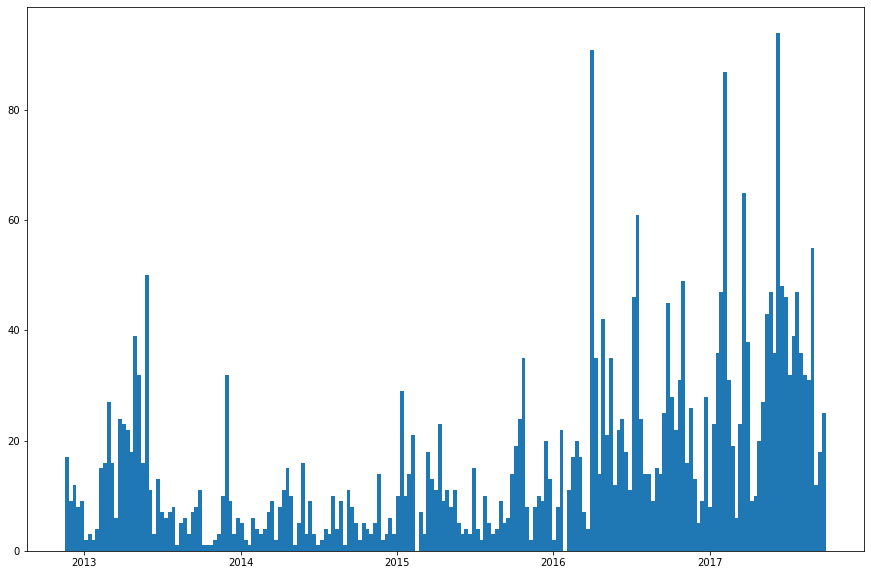

In [93]:
df["Time"].hist(bins = 200, grid = False, figsize = (15,10));

In [110]:
df = df.rename(columns= {"Time": "DateTime"})
df["Time"] = df.DateTime.dt.time
df

,Tweet,DateTime,Retweet from,User,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,10:44:54
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,10:39:57
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,09:56:12
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,09:19:21
...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk,08:52:03
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk,08:38:31
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk,08:30:44
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk,08:59:46


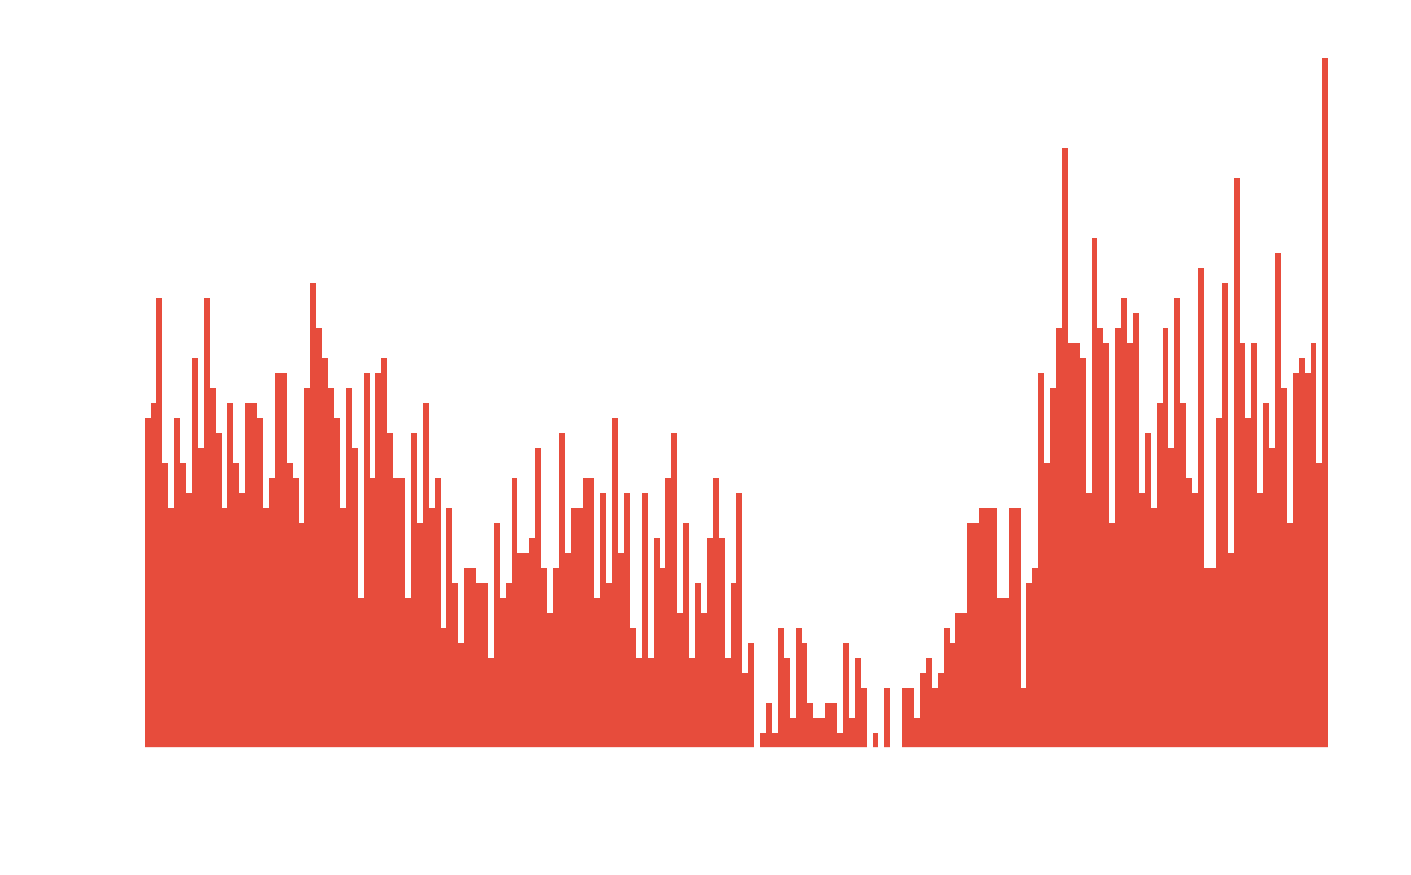

In [9]:
df.Time.hist(bins=200, grid=False);

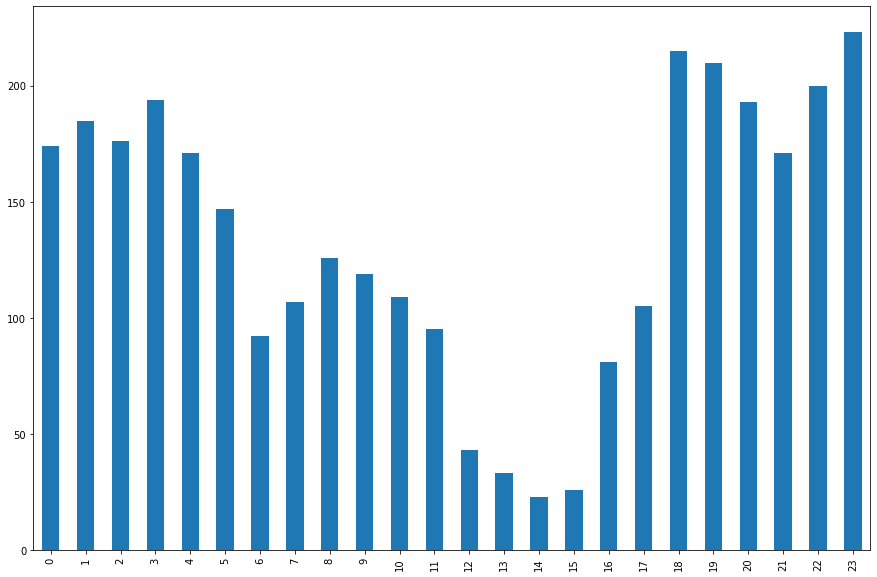

In [113]:
df.DateTime.dt.hour.value_counts().sort_index().plot.bar(figsize = (15,10));

So, This probably means the time zone is unset (UTC) and we should put it in Elon's Los Angelese time. So, what is this in my time zone?
Given Elon is in LA, I assume his time zone is Pacific Standard Time(GMT -8). We will convert to GMT + 10, AEST.

In [114]:
df.DateTime = df.DateTime.dt.tz_localize("Europe/Istanbul")
df

,Tweet,DateTime,Retweet from,User,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19+03:00,NaN,elonmusk,17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54+03:00,SpaceX,elonmusk,10:44:54
2,@bigajm Yup :),2017-09-29 10:39:57+03:00,NaN,elonmusk,10:39:57
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12+03:00,NaN,elonmusk,09:56:12
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21+03:00,NaN,elonmusk,09:19:21
...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03+02:00,NaN,elonmusk,08:52:03
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31+02:00,NaN,elonmusk,08:38:31
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44+02:00,NaN,elonmusk,08:30:44
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46+02:00,NaN,elonmusk,08:59:46


In [117]:
# df.DateTime.dt.tz_convert(None).dt.tz_localize("America/Los_Angeles")
# Note this doesn't work

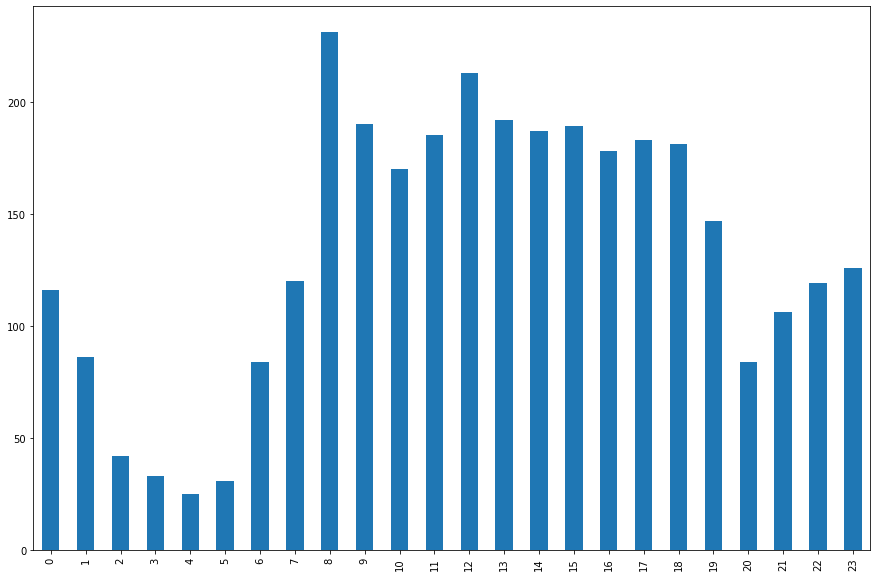

In [119]:
df["LATime"] = df.DateTime.dt.tz_convert("America/Los_Angeles")
df.LATime.dt.hour.value_counts().sort_index().plot.bar(figsize = (15,10));

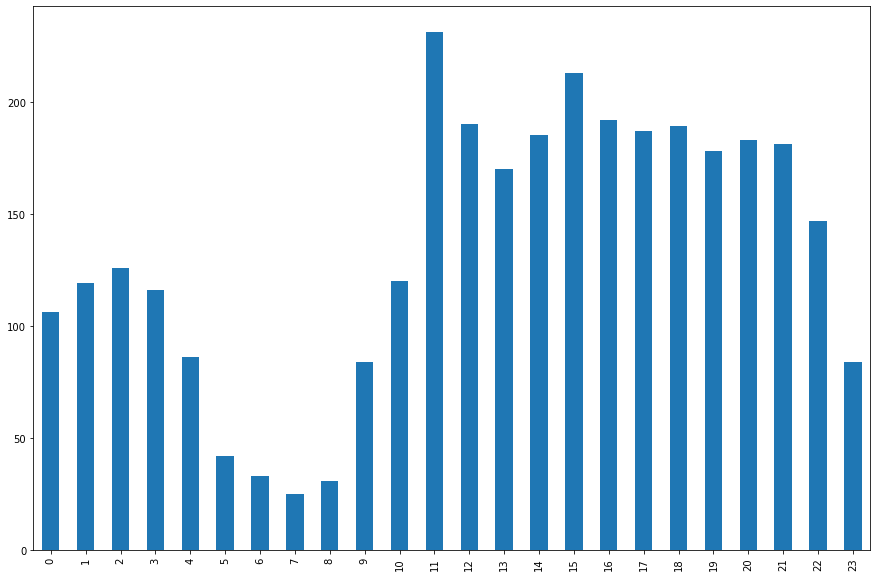

In [122]:
df["AmericanTime"] = df.DateTime.dt.tz_convert("America/New_York")
df.AmericanTime.dt.hour.value_counts().sort_index().plot.bar(figsize = (15,10));

To access all timezones

In [123]:
import pytz
for t in pytz.all_timezones:
    print(t)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad